In [1]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
#matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.unicode']=False
import os
os.getcwd()
#from Isotope_CR import isotope
from Isotope_CR import Nuclei


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [2]:
#LOAD DATA AT HOME
# READ IN SOME MODELS. PICK 3 FOR TESTING
# get FITS capabilities
from astropy.io import fits
# get tar working lib
import tarfile
import cosmic_ray_nuclei_index
from cosmic_ray_nuclei_index import rigidity_calc, undo_log_energy, log_energy
from get_splines import *
###FLUXES### in order as the elements we have above
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
#'C:\\Users\\kreativekeith422\\Downloads\\AMS_Data\\Ratios\\'

tar = tarfile.open("C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP\\runs_L_D.tar.gz")
i=0
tots=0
list_found=[]
while i<len(tar.getmembers()):
    if tar.getmembers()[i].isfile():
        if tar.getmembers()[i].name.find('nuclei_full') !=-1:
            list_found.append(i)
            print(tar.getmembers()[i].name)
        # find the string nuclei_full in the filenam
            tots+=1
    i+=1
print(tots)
# Get some specific models
models_to_find=["GALPROP/runs_L_D/L_3_D_6/nuclei_full_56_L_3_D_6", "GALPROP/runs_L_D/L_3_D_3/nuclei_full_56_L_3_D_3","GALPROP/runs_L_D/L_7_D_6/nuclei_full_56_L_7_D_6"]
#tar = tarfile.open("runs_L_D.tar.gz")
k=0
names=[]
FITS_data_full=[]
fluxes_per_element_full=[]
fluxes_per_element_per_fits_file=[] # clear this after every load of a fits file
#while k<:
while k<len(list_found): 
    fluxes_per_element_per_fits_file=[]
    j=list_found[k]
    open_file=tar.extractfile(tar.getmembers()[j].name)
    if (tar.getmembers()[j].name==models_to_find[0]) or (tar.getmembers()[j].name==models_to_find[1]) or (tar.getmembers()[j].name==models_to_find[2]):
        fileFITS_data = fits.getdata(open_file)
        print(tar.getmembers()[j].name)
        print(type(fileFITS_data))
        print(fileFITS_data.shape)
        for i in cosmic_ray_nuclei_index.element_index: fluxes_per_element_per_fits_file.append(
            fileFITS_data[i,:,cosmic_ray_nuclei_index.z_loc,cosmic_ray_nuclei_index.y_loc,cosmic_ray_nuclei_index.x_loc])
        fluxes_per_element_per_fits_file.append(tar.getmembers()[j].name)
        #FITS_data_full.append(fileFITS_data)
        # append to the arrays we need instead:
        names.append(tar.getmembers()[j].name)
        fluxes_per_element_full.append(fluxes_per_element_per_fits_file)
    k+=1
tar.close()

GALPROP/runs_L_D/L_10_D_10/nuclei_full_56_L_10_D_10
GALPROP/runs_L_D/L_10_D_11/nuclei_full_56_L_10_D_11
GALPROP/runs_L_D/L_10_D_12/nuclei_full_56_L_10_D_12
GALPROP/runs_L_D/L_10_D_3/nuclei_full_56_L_10_D_3
GALPROP/runs_L_D/L_10_D_4/nuclei_full_56_L_10_D_4
GALPROP/runs_L_D/L_10_D_5/nuclei_full_56_L_10_D_5
GALPROP/runs_L_D/L_10_D_6/nuclei_full_56_L_10_D_6
GALPROP/runs_L_D/L_10_D_7/nuclei_full_56_L_10_D_7
GALPROP/runs_L_D/L_10_D_8/nuclei_full_56_L_10_D_8
GALPROP/runs_L_D/L_10_D_9/nuclei_full_56_L_10_D_9
GALPROP/runs_L_D/L_1_D_10/nuclei_full_56_L_1_D_10
GALPROP/runs_L_D/L_1_D_11/nuclei_full_56_L_1_D_11
GALPROP/runs_L_D/L_1_D_12/nuclei_full_56_L_1_D_12
GALPROP/runs_L_D/L_1_D_3/nuclei_full_56_L_1_D_3
GALPROP/runs_L_D/L_1_D_4/nuclei_full_56_L_1_D_4
GALPROP/runs_L_D/L_1_D_5/nuclei_full_56_L_1_D_5
GALPROP/runs_L_D/L_1_D_6/nuclei_full_56_L_1_D_6
GALPROP/runs_L_D/L_1_D_7/nuclei_full_56_L_1_D_7
GALPROP/runs_L_D/L_1_D_8/nuclei_full_56_L_1_D_8
GALPROP/runs_L_D/L_1_D_9/nuclei_full_56_L_1_D_9
GALPROP/

In [3]:
#get energy axis and change to GeV/nuc (undo the logarithm to put in actual energy units)
energy=np.arange(2,9,0.304347391792257)
energy=undo_log_energy(energy)
energy_mev_nuc=energy.copy()
energy=np.true_divide(energy,10**3) #now in GeV/nuc
### ALL ISOTOPES FLUXES HAVE SAME ENERGY AXIS (GeV/n) ORIGINALLY ###
# now get isotopes fluxes example Be-10
model=0 # which model being looked at
# we dont want to log it
# we also need to change it units to correct units, involves dividing the flux by mev/nuc squared
Be10_flux=np.true_divide(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.be10_loc)],np.array(energy_mev_nuc)*np.array(energy_mev_nuc))
#this is the flux to add to the classes

print(energy)
print(energy_mev_nuc)
#print(Be10_flux)


[1.00000000e-01 2.01533567e-01 4.06157787e-01 8.18544275e-01
 1.64964148e+00 3.32458131e+00 6.70014730e+00 1.35030459e+01
 2.72131700e+01 5.48436722e+01 1.10528409e+02 2.22751845e+02
 4.48919739e+02 9.04723963e+02 1.82332247e+03 3.67460682e+03
 7.40556620e+03 1.49247017e+04 3.00782838e+04 6.06178382e+04
 1.22165292e+05 2.46204070e+05 4.96183844e+05 9.99977000e+05]
[100.0, 201.5335670604046, 406.157786520906, 818.5442750691649, 1649.6414755156181, 3324.581309314516, 6700.1473024850475, 13503.045856999594, 27213.169977413458, 54843.67216569244, 110528.40882243423, 222751.84491495864, 448919.7387499766, 904723.9627410772, 1823322.4741623388, 3674606.821193385, 7405566.202195972, 14924701.728305276, 30078283.76617948, 60617838.184532106, 122165291.56819156, 246204069.80712014, 496183844.1301778, 999977000.2529852]


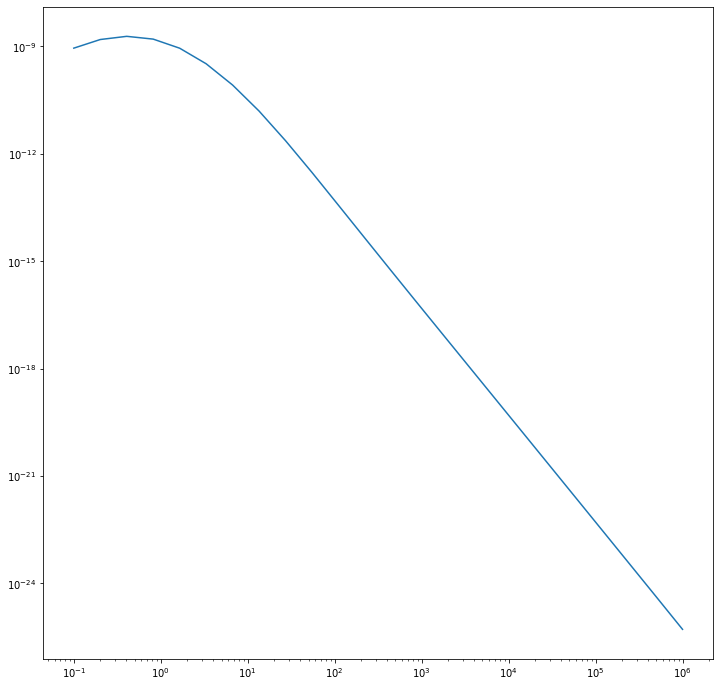

In [4]:
#get rid of this later, just a test plot
plt.figure(figsize=(12,12))
plt.plot(energy,Be10_flux)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [5]:
#try out an isotope class
import cosmic_ray_nuclei_index
from cosmic_ray_nuclei_index import rigidity_calc, undo_log_energy, log_energy
#from Isotope_CR import isotope
#be_10_obj=isotope('Be-10',10,4)

In [6]:
from Isotope_CR import Nuclei

c_obj=Nuclei('carbon',6)

In [7]:
c_obj.add_isotopes('C-12',12,6)
c_obj.add_isotopes('C-12',13,6)

In [8]:
c12=c_obj.list_isotopes[0]
c13=c_obj.list_isotopes[1]

In [9]:
c12.name

'C-12'

In [10]:
#c12=isotope('C-12',12,6)
c12.add_energy_per_nucleon(energy)
c12.add_flux(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)])
c13.add_energy_per_nucleon(energy)
c13.add_flux(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)])
#get two modulations
solar_1=0.6
solar_2=1.2
fluxes_c12=[]
energies_c12=[]
fluxes_c13=[]
energies_c13=[]
#no modulation
fluxes_c12.append(c12.flux.copy())
energies_c12.append(c12.energy.copy())
fluxes_c13.append(c13.flux.copy())
energies_c13.append(c13.energy.copy())
#mod1
c12.add_modulation(solar_1)
fluxes_c12.append(c12.flux_modulated.copy())
energies_c12.append(c12.energy_modulated.copy())
c13.add_modulation(solar_1)
fluxes_c13.append(c13.flux_modulated.copy())
energies_c13.append(c13.energy_modulated.copy())

#mod2
c12.add_modulation(solar_2)
fluxes_c12.append(c12.flux_modulated.copy())
energies_c12.append(c12.energy_modulated.copy())
c13.add_modulation(solar_2)
fluxes_c13.append(c13.flux_modulated.copy())
energies_c13.append(c13.energy_modulated.copy())

def make_plot_comp_solarmod(energy1,energy2,energy3,flux1,flux2,flux3):
    fnt=22

    x1=0.5*energy2.min()
    x2=10**2

    y1=10**-10
    y2=10*flux2.max()

    plt.figure(figsize=(14,10))
    

    
    plt.plot(energy1,flux1,'r',marker="X",ms=10,label="not modulated")
    plt.plot(energy2,flux2,'b',marker="o",ms=10,label="modulated 600MV")
    plt.plot(energy3,flux3,'k',marker="X",ms=10,label="modulated 1200MV")
    #plt.plot(energy4,flux4,'c',marker="o",ms=10,label="modulated 1200MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Kinetic Energy [GeV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("C12 flux "r'$cm^{-2} s^{-1} sr^{-1} (MeV/nuc)^{-1}}$',fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("Solar Modulation test", fontsize=fnt)
    plt.savefig("solar_modulation_test.png")
    #don't show on supercomputer
    plt.show()

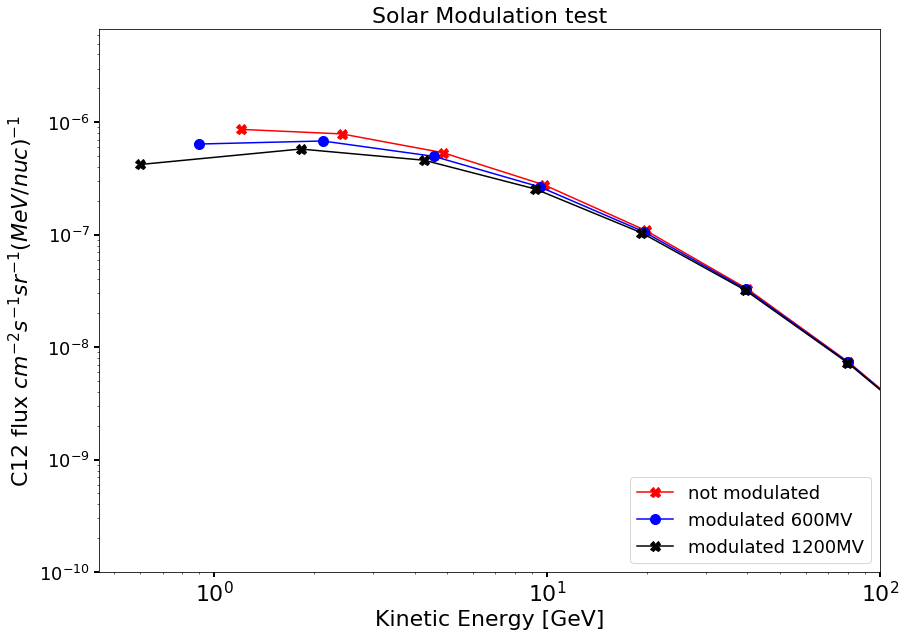

In [11]:
make_plot_comp_solarmod(*energies_c12,*fluxes_c12)

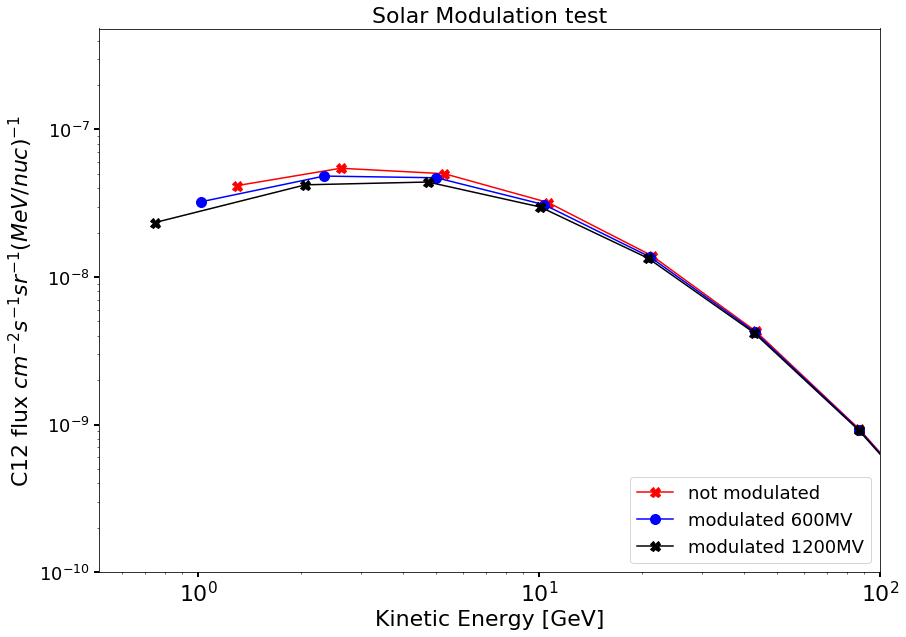

In [12]:
make_plot_comp_solarmod(*energies_c13,*fluxes_c13)

In [13]:
spline_steps=2000
c_obj.calc_total_flux(spline_steps)

In [14]:
def make_plot_comp_solarmod_total(energy1,energy2,flux1,flux2):
    fnt=22

    x1=0.5*energy2.min()
    x2=10**2

    y1=0.1*flux2.min()
    y2=10*flux2.max()

    plt.figure(figsize=(14,10))
    

    
    plt.plot(energy1,flux1,'r',marker="X",ms=10,label="not modulated")
    plt.plot(energy2,flux2,'b',marker="o",ms=10,label="modulated 600MV")
#    plt.plot(energy3,flux3,'k',marker="X",ms=10,label="modulated 1200MV")
    #plt.plot(energy4,flux4,'c',marker="o",ms=10,label="modulated 1200MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Rigidity [GV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("Ctotal flux "r'$cm^{-2} s^{-1} sr^{-1} (MeV/nuc)^{-1}}$',fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("Solar Modulation test", fontsize=fnt)
    plt.savefig("solar_modulation_test.png")
    #don't show on supercomputer
    plt.show()

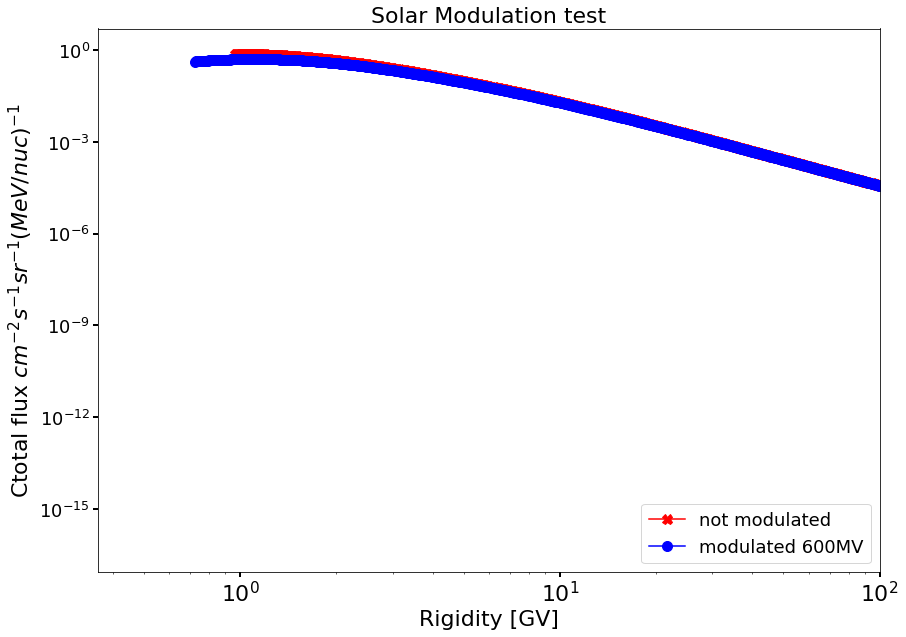

In [15]:
rigl=[]
fluxl=[]
fluxl.append(c_obj.flux_rigidity.copy())
fluxl.append(c_obj.flux_rigidity_modulated.copy())
rigl.append(c_obj.rigidity.copy())
rigl.append(np.array(c_obj.rigidity_modulated.copy()))
make_plot_comp_solarmod_total(*rigl,*fluxl)

In [16]:
def make_carbon_nuclei(name,charge):
    c_obj=Nuclei(name,charge)
    c_obj.add_isotopes('C-12',12,charge)
    c_obj.add_isotopes('C-12',13,charge)
    c12=c_obj.list_isotopes[0]
    c13=c_obj.list_isotopes[1]
    c12.add_energy_per_nucleon(energy)
    c12.add_flux(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon12_loc)])
    c13.add_energy_per_nucleon(energy)
    c13.add_flux(fluxes_per_element_full[model][cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon13_loc)])
    solar_1=1.2
    c12.add_modulation(solar_1)
    c13.add_modulation(solar_1)
    spline_steps=2000
    c_obj.calc_total_flux(spline_steps)
    return c_obj

In [17]:
c_obj1=make_carbon_nuclei('carbon',6)

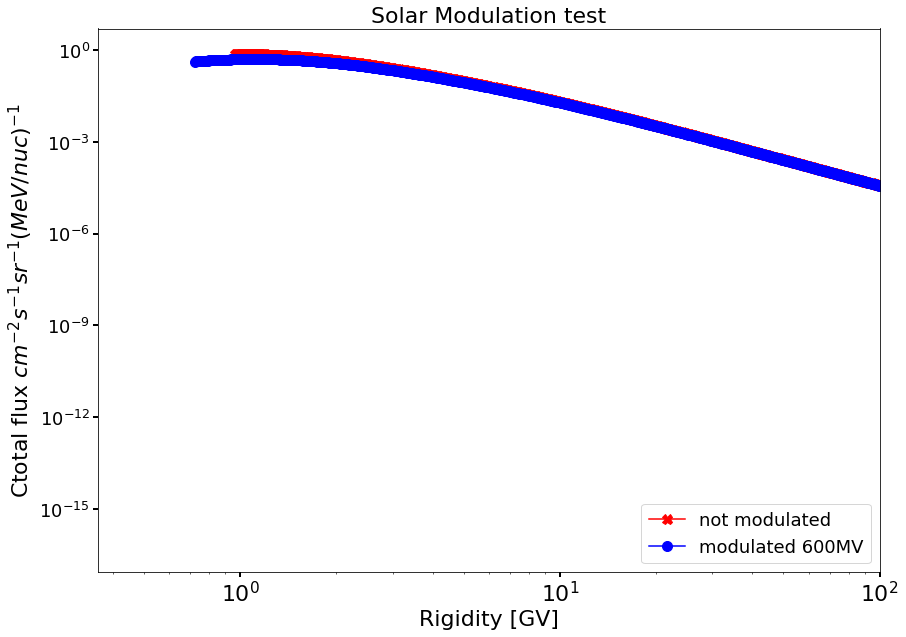

In [18]:
rigl=[]
fluxl=[]
fluxl.append(c_obj1.flux_rigidity.copy())
fluxl.append(c_obj1.flux_rigidity_modulated.copy())
rigl.append(c_obj1.rigidity.copy())
rigl.append(c_obj1.rigidity_modulated.copy())
make_plot_comp_solarmod_total(*rigl,*fluxl)

In [37]:
def make_oxygen_nuclei(name,charge,energy_per_nuc,model,solar_phi,spline_steps):
    o_obj=Nuclei(name,charge)
    o_obj.add_isotopes('O-16',16,charge)
    o_obj.add_isotopes('O-17',17,charge)
    o_obj.add_isotopes('O-18',18,charge)
    j=0
    print(len(o_obj.list_isotopes))
    while j< len(o_obj.list_isotopes):
        o_obj.list_isotopes[j].add_energy_per_nucleon(energy_per_nuc)
        print(cosmic_ray_nuclei_index.oxygen_list[j])
        print(j)
        o_obj.list_isotopes[j].add_flux(fluxes_per_element_full[model][
            cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.oxygen_list[j])])
        o_obj.list_isotopes[j].add_modulation(solar_phi)
        j+=1
    o_obj.add_isotope_fluxes()
    o_obj.calc_total_flux(spline_steps)
    return o_obj
def make_carbon_nuclei(name,charge,energy_per_nuc,model,solar_phi,spline_steps):
    c_obj=Nuclei(name,charge)
    c_obj.add_isotopes('C-12',12,charge)
    c_obj.add_isotopes('C-13',13,charge)
    j=0
    print(len(c_obj.list_isotopes))
    while j< len(c_obj.list_isotopes):
        c_obj.list_isotopes[j].add_energy_per_nucleon(energy_per_nuc)
        c_obj.list_isotopes[j].add_flux(fluxes_per_element_full[model][
            cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.carbon_list[j])])
        c_obj.list_isotopes[j].add_modulation(solar_phi)
        j+=1
    c_obj.add_isotope_fluxes()
    c_obj.calc_total_flux(spline_steps)
    return c_obj

In [38]:
o_obj1=make_oxygen_nuclei("oxygen",8,energy,0,0.6,2000)
c_obj1=make_carbon_nuclei("carbon",6,energy,0,0.6,2000)

3
23
0
24
1
25
2
2


In [39]:
def make_plot_comp_solarmod_total(energy1,energy2,energy3,energy4,flux1,flux2,flux3,flux4):
    fnt=22

    x1=0.5*energy2.min()
    x2=10**3

    y1=10**-8
    y2=10*flux1.max()

    plt.figure(figsize=(14,10))
    

    
    plt.plot(energy1,flux1,'r',marker="X",ms=2,label="C-not modulated")
    plt.plot(energy2,flux2,'b',marker="o",ms=2,label="C-modulated 600MV")
    plt.plot(energy3,10**(-2)*flux3,'k',marker="X",ms=2,label="O-not modulated")
    plt.plot(energy4,10**(-2)*flux4,'c',marker="o",ms=2,label="O-modulated 600MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Kinetic Energy [GeV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("total flux "r'$m^{-2} s^{-1} sr^{-1} GeV^{-1}}$',fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("Solar Modulation test", fontsize=fnt)
    plt.savefig("solar_modulation_test.png")
    #don't show on supercomputer
    plt.show()

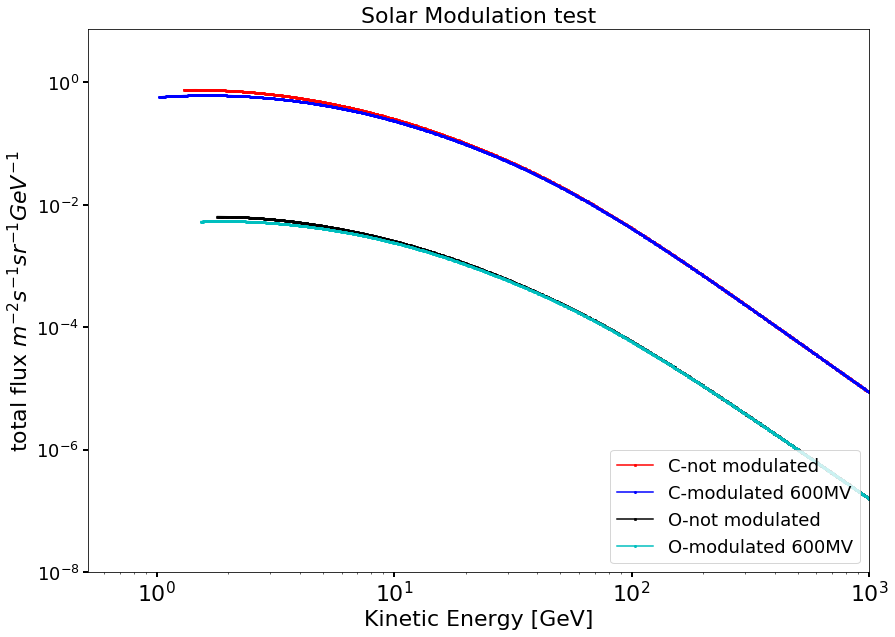

In [40]:
rigl=[]
fluxl=[]
enel=[]
fluxl.append(c_obj1.flux_energy.copy())
fluxl.append(c_obj1.flux_energy_modulated.copy())
fluxl.append(o_obj1.flux_energy.copy())
fluxl.append(o_obj1.flux_energy_modulated.copy())

rigl.append(c_obj1.rigidity.copy())
rigl.append(c_obj1.rigidity_modulated.copy())
rigl.append(o_obj1.rigidity.copy())
rigl.append(o_obj1.rigidity_modulated.copy())

enel.append(c_obj1.energy.copy())
enel.append(c_obj1.energy_modulated.copy())
enel.append(o_obj1.energy.copy())
enel.append(o_obj1.energy_modulated.copy())


make_plot_comp_solarmod_total(*enel,*fluxl)

In [41]:
### Try B/C ratio with objects
def make_boron_nuclei(name,charge,energy_per_nuc,model,solar_phi,spline_steps):
    n_obj=Nuclei(name,charge)
    n_obj.add_isotopes('B-10',10,charge)
    n_obj.add_isotopes('B-11',11,charge)
    j=0
    print(len(n_obj.list_isotopes))
    while j< len(n_obj.list_isotopes):
        n_obj.list_isotopes[j].add_energy_per_nucleon(energy_per_nuc)
        #print(cosmic_ray_nuclei_index.boron_list[j])
        #print(j)
        n_obj.list_isotopes[j].add_flux(fluxes_per_element_full[model][
            cosmic_ray_nuclei_index.element_index.index(cosmic_ray_nuclei_index.boron_list[j])])
        n_obj.list_isotopes[j].add_modulation(solar_phi)
        j+=1
    #print(n_obj.list_isotopes[-1].flux)
    n_obj.add_isotope_fluxes()
    n_obj.calc_total_flux(spline_steps)
    return n_obj


In [42]:
b_obj=make_boron_nuclei("boron",5,energy,0,0.6,2000)

2


In [43]:
b_obj.flux_rigidity

array([9.06188003e-02, 9.11242765e-02, 9.16287602e-02, ...,
       1.09814810e-18, 1.07437090e-18, 1.05110618e-18])

In [44]:
# ratio should be a function to pass two nuclei objects 
#and spits back interpolated flux versus rigidity (and maybe flux versus energy as separate function)
def flux_ratio_versus_rigidity(numerator,denominator,spline_steps):
    num_r=np.array(log_energy(numerator.rigidity.copy()))
    den_r=np.array(log_energy(denominator.rigidity.copy()))
    r_list=[num_r,den_r]
    num_f=np.array(log_energy(numerator.flux_rigidity.copy()))
    den_f=np.array(log_energy(denominator.flux_rigidity.copy()))
    f_list=[num_f,den_f]
    #common x range
    spline_min_R,spline_max_R=find_interpolation_range(*r_list)
    #numerator
    num_rig_rtn,num_flux_rtn=spline(num_r,num_f, spline_steps,spline_min_R,spline_max_R)
    num_rig_rtn=np.array(undo_log_energy(num_rig_rtn))
    num_flux_rtn=np.array(undo_log_energy(num_flux_rtn))
    #denominator
    den_rig_rtn,den_flux_rtn=spline(den_r,den_f, spline_steps,spline_min_R,spline_max_R)
    den_rig_rtn=np.array(undo_log_energy(den_rig_rtn))
    den_flux_rtn=np.array(undo_log_energy(den_flux_rtn))
    ratio=np.true_divide(num_flux_rtn,den_flux_rtn)
    return num_rig_rtn,ratio
def flux_ratio_versus_energy(numerator,denominator,spline_steps):
    num_r=np.array(log_energy(numerator.energy.copy()))
    den_r=np.array(log_energy(denominator.energy.copy()))
    r_list=[num_r,den_r]
    num_f=np.array(log_energy(numerator.flux_energy.copy()))
    den_f=np.array(log_energy(denominator.flux_energy.copy()))
    f_list=[num_f,den_f]
    #common x range
    spline_min_R,spline_max_R=find_interpolation_range(*r_list)
    #numerator
    num_rig_rtn,num_flux_rtn=spline(num_r,num_f, spline_steps,spline_min_R,spline_max_R)
    num_rig_rtn=np.array(undo_log_energy(num_rig_rtn))
    num_flux_rtn=np.array(undo_log_energy(num_flux_rtn))
    #denominator
    den_rig_rtn,den_flux_rtn=spline(den_r,den_f, spline_steps,spline_min_R,spline_max_R)
    den_rig_rtn=np.array(undo_log_energy(den_rig_rtn))
    den_flux_rtn=np.array(undo_log_energy(den_flux_rtn))
    ratio=np.true_divide(num_flux_rtn,den_flux_rtn)
    return num_rig_rtn,ratio


In [45]:
B_C_rigidity,B_C_ratior=flux_ratio_versus_rigidity(b_obj,c_obj1,2000)
B_C_energy,B_C_ratioe=flux_ratio_versus_energy(b_obj,c_obj1,2000)

In [52]:
def make_plot_ratio(energy1,flux1):
    fnt=22

    x1=4*10**-1
    x2=2.5*10**3

    y1=0.02
    y2=0.4

    plt.figure(figsize=(14,10))
    

    
    plt.plot(energy1,flux1,'r--',label="C-not modulated")
    #plt.plot(energy2,flux2,'b',marker="o",ms=2,label="C-modulated 600MV")
    #plt.plot(energy3,10**(-2)*flux3,'k',marker="X",ms=2,label="O-not modulated")
    #plt.plot(energy4,10**(-2)*flux4,'c',marker="o",ms=2,label="O-modulated 600MV")

    #plt.plot(energy3,flux3,'g',marker="*",ms=10,label="modulated 1200MV")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Rigidity [GV]",fontsize=fnt)
    plt.xticks(fontsize=fnt)
    plt.ylabel("B/C flux ratio",fontsize=fnt)
    plt.yticks(fontsize=fnt-4)
    plt.xlim([x1,x2])
    plt.ylim([y1,y2])
    plt.legend(loc='lower right', fontsize=fnt-4)
    ax = plt.gca()
    ax.tick_params(width=2,length=5)
    #plt.setp(plt.axis.tick_params(axis=both, width=3,length=3))
    plt.title("B/C ratio test", fontsize=fnt)
    plt.savefig("B_C_ratio_test.png")
    #don't show on supercomputer
    plt.show()

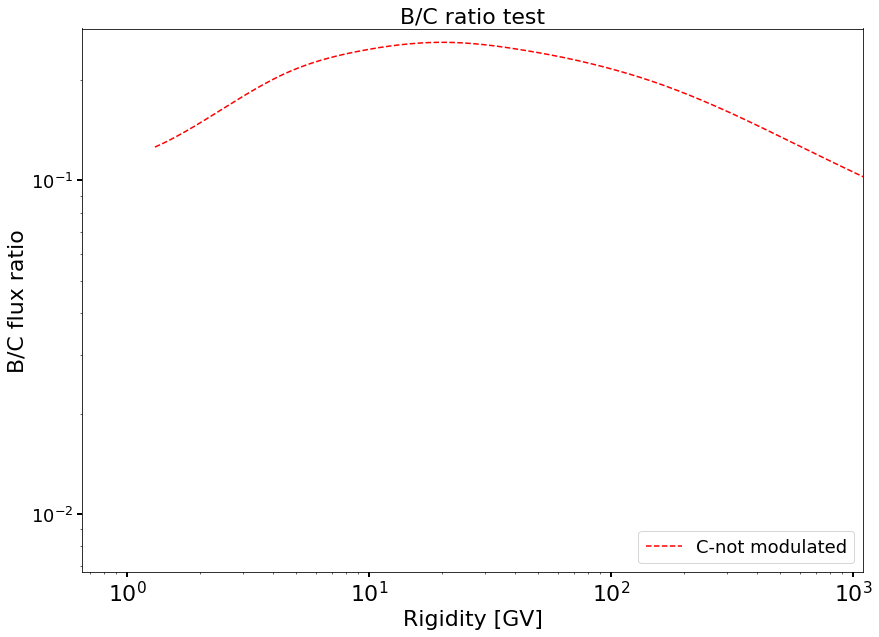

In [47]:
make_plot_ratio(B_C_energy,B_C_ratioe)

In [48]:
def flux_ratio_versus_energypn(numerator,denominator,spline_steps):
    num_r=np.array(log_energy(numerator.energy_per_nucleon.copy()))
    den_r=np.array(log_energy(denominator.energy_per_nucleon.copy()))
    r_list=[num_r,den_r]
    num_f=np.array(log_energy(numerator.flux_energy_per_nucleon.copy()))
    den_f=np.array(log_energy(denominator.flux_energy_per_nucleon.copy()))
    f_list=[num_f,den_f]
    #common x range
    spline_min_R,spline_max_R=find_interpolation_range(*r_list)
    #numerator
    num_rig_rtn,num_flux_rtn=spline(num_r,num_f, spline_steps,spline_min_R,spline_max_R)
    num_rig_rtn=np.array(undo_log_energy(num_rig_rtn))
    num_flux_rtn=np.array(undo_log_energy(num_flux_rtn))
    #denominator
    den_rig_rtn,den_flux_rtn=spline(den_r,den_f, spline_steps,spline_min_R,spline_max_R)
    den_rig_rtn=np.array(undo_log_energy(den_rig_rtn))
    den_flux_rtn=np.array(undo_log_energy(den_flux_rtn))
    ratio=np.true_divide(num_flux_rtn,den_flux_rtn)
    return num_rig_rtn,ratio

In [49]:
B_C_energypn,B_C_ratioepn=flux_ratio_versus_energypn(b_obj,c_obj1,2000)

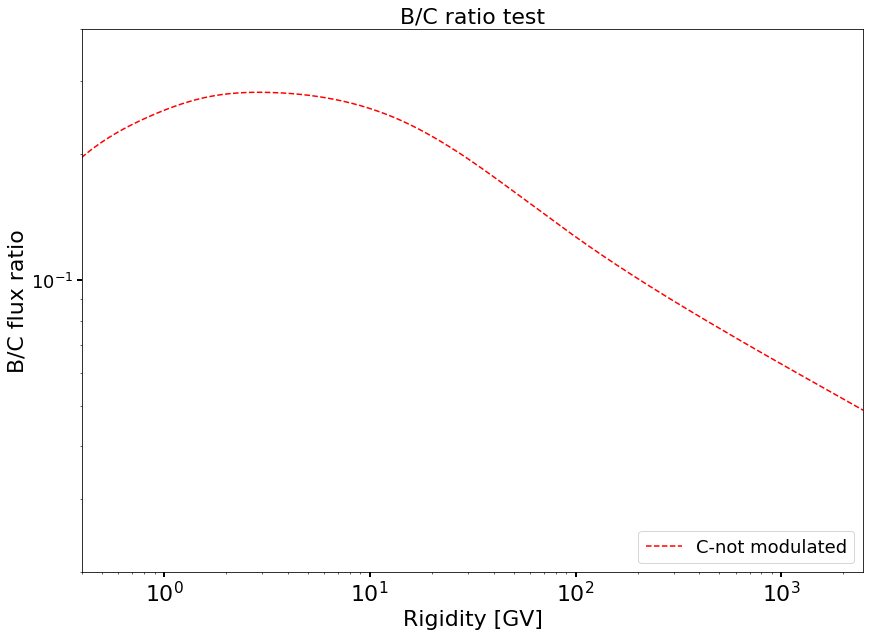

In [53]:
make_plot_ratio(B_C_energypn,B_C_ratioepn)

In [50]:
b_obj.list_isotopes[0].energy_per_nucleon

array([1.00000000e-01, 2.01533567e-01, 4.06157787e-01, 8.18544275e-01,
       1.64964148e+00, 3.32458131e+00, 6.70014730e+00, 1.35030459e+01,
       2.72131700e+01, 5.48436722e+01, 1.10528409e+02, 2.22751845e+02,
       4.48919739e+02, 9.04723963e+02, 1.82332247e+03, 3.67460682e+03,
       7.40556620e+03, 1.49247017e+04, 3.00782838e+04, 6.06178382e+04,
       1.22165292e+05, 2.46204070e+05, 4.96183844e+05, 9.99977000e+05])

In [36]:
c_obj1.energy_per_nucleon

[]